In [2]:
# Libraries

import requests
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# API for earthquakes 

# LOAD DATA

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

# request paramter
params = {
    "format": "geojson",       
    "starttime": "2024-01-01",
    "endtime": "2025-04-25",   
    "minmagnitude": 4          
}
# API call
response = requests.get(url, params=params)

# test API
if response.status_code == 200:
    print(f'API works ({response.status_code})')
else:
    print(f'API does not work. Error: {response.status_code}')

API works (200)


In [4]:
# get data in json format
data = response.json()

# extract list for earthquakes (features)
earthquakes = data["features"]

# transform to DataFrame – JSON-normalizing flattens data
df = pd.json_normalize(earthquakes)

df["properties.time"] = pd.to_datetime(df["properties.time"], unit='ms')

In [5]:
# Rename columns
column_rename_map = {
    'type': 'geojson_type',
    'id': 'event_id',
    'properties.mag': 'magnitude',
    'properties.tz':'time_zone',
    'properties.place': 'location_description',
    'properties.time': 'event_time',
    'properties.updated': 'last_updated',
    'properties.url': 'event_url',
    'properties.detail': 'api_detail_url',
    'properties.status': 'event_status',
    'properties.tsunami': 'tsunami_flag',
    'properties.sig': 'significance',
    'properties.net': 'reporting_network',
    'properties.code': 'network_event_code',
    'properties.ids': 'alternate_ids',
    'properties.sources': 'data_sources',
    'properties.types': 'available_products',
    'properties.nst': 'num_reporting_stations',
    'properties.dmin': 'min_station_distance',
    'properties.rms': 'rms_deviation',
    'properties.gap': 'station_gap',
    'properties.magType': 'magnitude_type',
    'properties.type': 'event_type',
    'properties.title': 'event_title',
    'geometry.type': 'geometry_type',
    'properties.felt': 'felt',
    'properties.cdi': 'cdi', 
    'properties.mmi': 'mmi',
    'properties.alert': 'alert',
    'geometry.coordinates': 'coordinates'
}

df = df.rename(columns=column_rename_map)


In [6]:
# 2.Perform full EDA: Clean the messy data, find key patterns, and visualize relationships.

# 2.1. Basic dataset information
print("Basic information about the dataset: \n")
df.info()

print("Summary statistics: \n")
df.describe()

Basic information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19010 entries, 0 to 19009
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geojson_type            19010 non-null  object        
 1   event_id                19010 non-null  object        
 2   magnitude               19010 non-null  float64       
 3   location_description    19010 non-null  object        
 4   event_time              19010 non-null  datetime64[ns]
 5   last_updated            19010 non-null  int64         
 6   time_zone               0 non-null      object        
 7   event_url               19010 non-null  object        
 8   api_detail_url          19010 non-null  object        
 9   felt                    2594 non-null   float64       
 10  cdi                     2594 non-null   float64       
 11  mmi                     1194 non-null   float64       
 12  alert  

,magnitude,event_time,last_updated,felt,cdi,mmi,tsunami_flag,significance,num_reporting_stations,min_station_distance,rms_deviation,station_gap
count,19010.000000,19010,1.901000e+04,2594.000000,2594.000000,1194.000000,19010.000000,19010.000000,18933.000000,18932.000000,19009.000000,18932.000000
mean,4.493253,2024-08-26 02:56:32.918869248,1.730421e+12,204.272938,3.433886,3.458707,0.007417,315.848290,49.807321,3.578735,0.716728,107.186382
min,4.000000,2024-01-01 00:37:09.096000,1.710020e+12,0.000000,0.000000,0.000000,0.000000,246.000000,6.000000,0.000000,0.000000,10.000000
25%,4.200000,2024-04-22 13:01:07.923500032,1.719958e+12,1.000000,2.200000,2.479500,0.000000,271.000000,23.000000,1.174750,0.560000,73.000000
50%,4.400000,2024-08-24 13:28:24.507500032,1.731187e+12,2.000000,3.300000,3.537000,0.000000,298.000000,36.000000,2.212000,0.700000,103.000000
75%,4.600000,2025-01-02 06:52:15.693499904,1.741968e+12,8.000000,4.300000,4.503000,0.000000,326.000000,62.000000,4.121250,0.850000,136.000000
max,7.700000,2025-04-24 22:22:57.240000,1.746293e+12,184639.000000,9.100000,9.882000,1.000000,2910.000000,619.000000,62.558000,1.910000,343.000000
std,0.376484,NaN,1.152617e+10,3887.561822,1.599842,1.868966,0.085805,75.615771,42.056703,4.748143,0.222213,46.269755


In [7]:
# 2.3. Missing values
# Check for missing values
print("Missing values in each column: \n")
print(df.isnull().sum())

Missing values in each column: 

geojson_type                  0
event_id                      0
magnitude                     0
location_description          0
event_time                    0
last_updated                  0
time_zone                 19010
event_url                     0
api_detail_url                0
felt                      16416
cdi                       16416
mmi                       17816
alert                     18143
event_status                  0
tsunami_flag                  0
significance                  0
reporting_network             0
network_event_code            0
alternate_ids                 0
data_sources                  0
available_products            0
num_reporting_stations       77
min_station_distance         78
rms_deviation                 1
station_gap                  78
magnitude_type                0
event_type                    0
event_title                   0
geometry_type                 0
coordinates                   0
dtype: 

In [8]:
# Decision on missing values
print(
    "Decision on how to handle missing values:\n"
    "The columns 'tz', 'nst', and 'dmin' will be dropped, as they are not relevant for the analysis.\n"
    "'time_zone' will also be dropped, since it contains no data at all.\n"
    "For the columns 'number_people_felt', 'community_determined_intensity', 'modified_mercalli_intensity', and 'alarm_system', "
    "approximately half of the data is missing. However, the information is valuable for the analysis.\n"
    "Therefore, I will create a dataframe where missing values in 'felt'-column are filled with mean value"
)

Decision on how to handle missing values:
The columns 'tz', 'nst', and 'dmin' will be dropped, as they are not relevant for the analysis.
'time_zone' will also be dropped, since it contains no data at all.
For the columns 'number_people_felt', 'community_determined_intensity', 'modified_mercalli_intensity', and 'alarm_system', approximately half of the data is missing. However, the information is valuable for the analysis.
Therefore, I will create a dataframe where missing values in 'felt'-column are filled with mean value


In [9]:
# Handling missing values
# Dropping columns
df_cleaned=df[['geojson_type', 'event_id', 'magnitude', 'location_description',
       'event_time', 'last_updated', 'event_url',
       'api_detail_url', 'felt',
       'cdi', 'mmi',
       'alert', 'event_status', 'tsunami_flag', 'significance',
       'reporting_network', 'network_event_code', 'alternate_ids',
       'data_sources', 'available_products',
       'rms_deviation',
       'magnitude_type', 'event_type', 'event_title', 'geometry_type',
       'coordinates']]

felt_related_cols = ['felt', 'cdi', 'mmi']

# DataFrame (null-values are replaced by median value for 'felt'-variables)
df_felt_complete = df.fillna({
    'felt': df['felt'].median(),
    'cdi': df['cdi'].median(),
    'mmi': df['mmi'].median()
})


In [10]:
# Define realistic business questions based on the data.
# 1. How does the magnitude of an earthquake affect the number of people who feel it?
# 2. How does the reported "felt" intensity of an earthquake differ from its actual magnitude?
# 3. Is there a correlation between the magnitude of an earthquake and the likelihood of a tsunami being triggered?

In [34]:
# 1. How does the magnitude of an earthquake affect the number of people who feel it?
# Descriptive statistics
df_felt_complete[['magnitude', 'felt']].describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
magnitude,19010.0,4.5,0.4,4.0,4.2,4.4,4.6,7.7
felt,19010.0,29.6,1437.5,0.0,2.0,2.0,2.0,184639.0


/var/folders/4f/3kkpfrvj36l44smm9z3jpzq80000gn/T/ipykernel_22093/1426898501.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_felt_complete.groupby('mag_bin')['felt'].mean().reset_index()


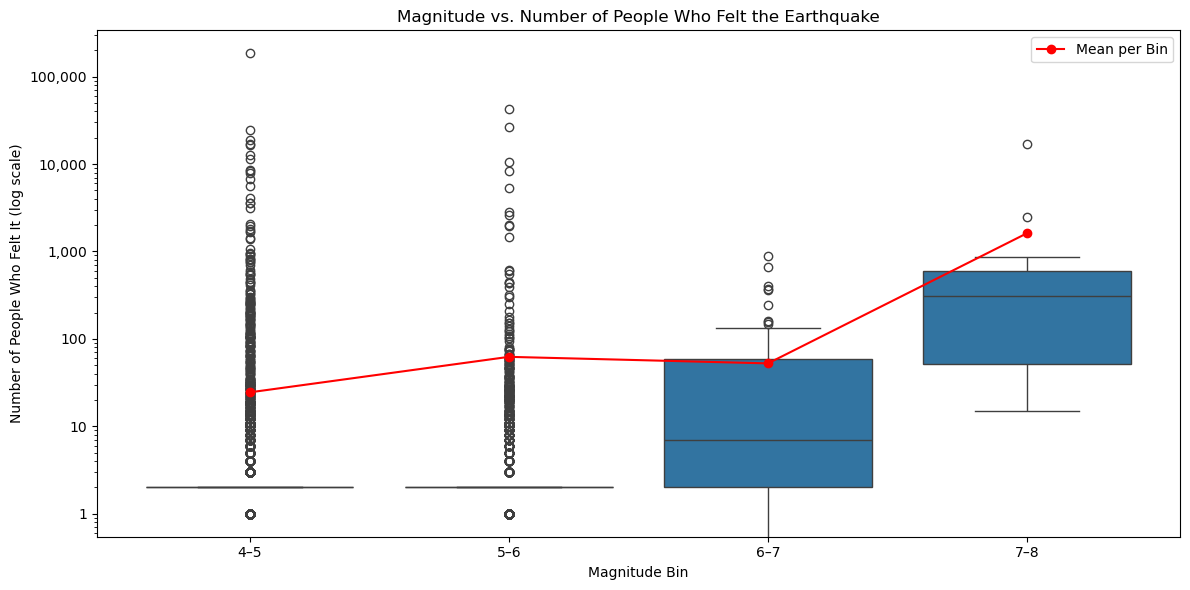

In [12]:
# Magnitude-Bins definieren
bins = [4, 5, 6, 7, 8, 9, 10]
labels = ['4–5', '5–6', '6–7', '7–8', '8–9', '9–10']
df_felt_complete['mag_bin'] = pd.cut(df_felt_complete['magnitude'], bins=bins, labels=labels, right=False)

# Mittelwert der 'felt'-Werte je Magnitude-Bin berechnen
group_means = df_felt_complete.groupby('mag_bin')['felt'].mean().reset_index()

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.boxplot(x='mag_bin', y='felt', data=df_felt_complete)

# Mittelwerte als rote Punkte anzeigen
plt.plot(range(len(group_means)), group_means['felt'], marker='o', color='red', label='Mean per Bin')

# Log-Skala für die Y-Achse aktivieren
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

# Achsentitel und Beschriftung
plt.xlabel('Magnitude Bin')
plt.ylabel('Number of People Who Felt It (log scale)')
plt.title('Magnitude vs. Number of People Who Felt the Earthquake')
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/4f/3kkpfrvj36l44smm9z3jpzq80000gn/T/ipykernel_22093/363690967.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


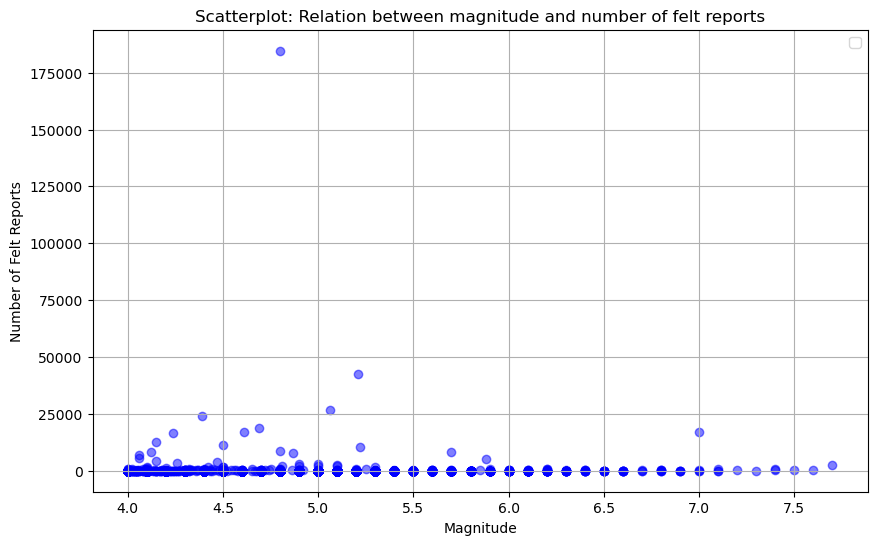

In [13]:
# Question 1: Scatterplots
plt.figure(figsize=(10, 6))

plt.scatter(df_felt_complete['magnitude'], df_felt_complete['felt'], alpha=0.5, color='blue')

plt.title('Scatterplot: Relation between magnitude and number of felt reports')
plt.xlabel('Magnitude')
plt.ylabel('Number of Felt Reports')
plt.legend()

plt.grid(True)
plt.show()



In [14]:
# Pearson Correlation Coefficient
correlation = df_felt_complete['magnitude'].corr(df_felt_complete['felt'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

# Interpretation der Korrelationsstärke
if correlation >= 0.7:
    strength = "a strong positive"
elif correlation >= 0.4:
    strength = "a moderate positive"
elif correlation >= 0.2:
    strength = "a weak positive"
elif correlation > 0:
    strength = "a very weak positive"
elif correlation <= -0.7:
    strength = "a strong negative"
elif correlation <= -0.4:
    strength = "a moderate negative"
elif correlation <= -0.2:
    strength = "a weak negative"
elif correlation < 0:
    strength = "a very weak negative"
else:
    strength = "no"

# Finaler Output
if correlation != 0:
    print(f"There is {strength} correlation: As the magnitude of an earthquake increases, the number of people who report feeling it tends to {'increase' if correlation > 0 else 'decrease'}.")
else:
    print("There is no correlation between earthquake magnitude and the number of people who reported feeling it.")


# Discussion about potential issues with imputation
print("\nNote: There are some potential issues with the imputation process.")
print("Since we replaced missing values with the median, this could have artificially influenced the correlation.")
print("Imputed values, especially if the missing data is not missing at random, might distort the results.")
print("It's possible that the imputation of 'felt' values with the median has skewed the relationship between magnitude and felt reports.")

Pearson Correlation Coefficient: 0.02
There is a very weak positive correlation: As the magnitude of an earthquake increases, the number of people who report feeling it tends to increase.

Note: There are some potential issues with the imputation process.
Since we replaced missing values with the median, this could have artificially influenced the correlation.
Imputed values, especially if the missing data is not missing at random, might distort the results.
It's possible that the imputation of 'felt' values with the median has skewed the relationship between magnitude and felt reports.


In [15]:
# 2. How does the reported "felt" intensity of an earthquake differ from its actual magnitude?
# Descriptive statistics
df_felt_complete[['magnitude', 'cdi']].describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
magnitude,19010.0,4.5,0.4,4.0,4.2,4.4,4.6,7.7
cdi,19010.0,3.3,0.6,0.0,3.3,3.3,3.3,9.1


Text(0.5, 1.0, 'Distribution of Difference Between CDI and Magnitude')

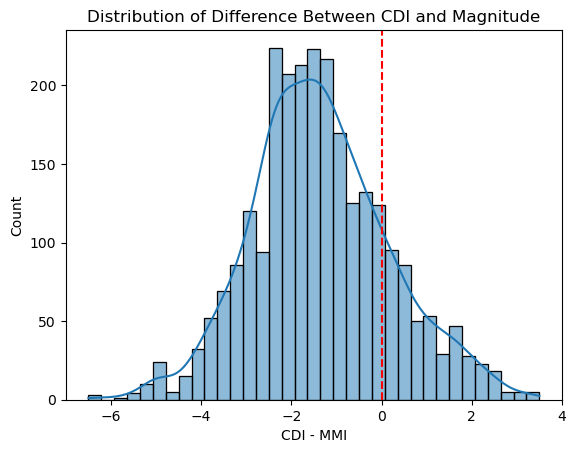

In [ ]:
df['diff'] = df['cdi'] - df['magnitude']
sns.histplot(df['diff'], kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('CDI - Magnitude')
plt.title('Distribution of Difference Between CDI and Magnitude')


In [17]:
# Pearson Correlation Coefficient
correlation = df_felt_complete['magnitude'].corr(df_felt_complete['cdi'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

# Interpretation der Korrelationsstärke
if correlation >= 0.7:
    strength = "a strong positive"
elif correlation >= 0.4:
    strength = "a moderate positive"
elif correlation >= 0.2:
    strength = "a weak positive"
elif correlation > 0:
    strength = "a very weak positive"
elif correlation <= -0.7:
    strength = "a strong negative"
elif correlation <= -0.4:
    strength = "a moderate negative"
elif correlation <= -0.2:
    strength = "a weak negative"
elif correlation < 0:
    strength = "a very weak negative"
else:
    strength = "no"

# Final output
if correlation != 0:
    print(f"There is {strength} correlation: As the magnitude of an earthquake increases, the perceived intensity of shaking by people (CDI) tends to {'increase' if correlation > 0 else 'decrease'}.")
else:
    print("There is no correlation between earthquake magnitude and perceived intensity of shaking (CDI).")


Pearson Correlation Coefficient: 0.18
There is a very weak positive correlation: As the magnitude of an earthquake increases, the perceived intensity of shaking by people (CDI) tends to increase.


/var/folders/4f/3kkpfrvj36l44smm9z3jpzq80000gn/T/ipykernel_22093/2257242286.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('mag_bin')['cdi'].mean().reset_index()


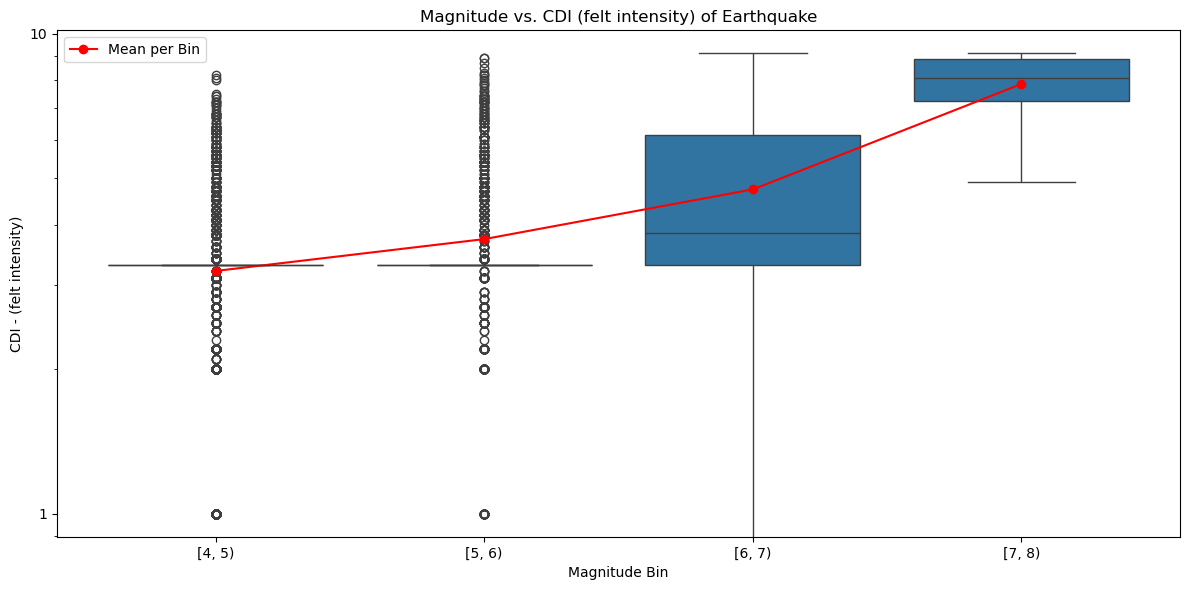

In [ ]:
# Magnitude-Bins definieren
bins = [4, 5, 6, 7, 8, 9, 10]
labels = ['4–5', '5–6', '6–7', '7–8', '8–9', '9–10']
df['mag_bin'] = pd.cut(df_felt_complete['magnitude'], bins=bins, labels=labels, right=False)

# Mittelwert der 'felt'-Werte je Magnitude-Bin berechnen
group_means = df.groupby('mag_bin')['cdi'].mean().reset_index()

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.boxplot(x='mag_bin', y='cdi', data=df_felt_complete)

# Mittelwerte als rote Punkte anzeigen
plt.plot(range(len(group_means)), group_means['cdi'], marker='o', color='red', label='Mean per Bin')

# Log-Skala für die Y-Achse aktivieren
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

# Achsentitel und Beschriftung
plt.xlabel('Magnitude Bin')
plt.ylabel('CDI - (felt intensity)')
plt.title('Magnitude vs. CDI (felt intensity) of Earthquake')
plt.legend()
plt.tight_layout()
plt.show()


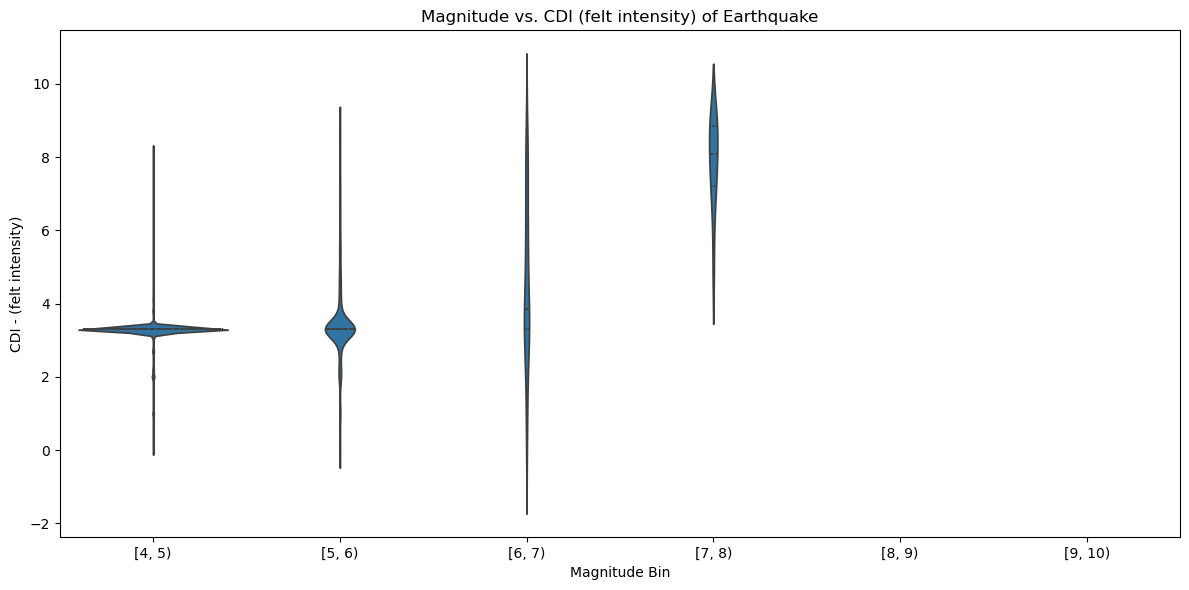

In [27]:
# Violinplot erstellen
plt.figure(figsize=(12, 6))
sns.violinplot(x='mag_bin', y='cdi', data=df_felt_complete, inner='quart')

# Achsentitel und Beschriftung
plt.xlabel('Magnitude Bin')
plt.ylabel('CDI - (felt intensity)')
plt.title('Magnitude vs. CDI (felt intensity) of Earthquake')
plt.tight_layout()
plt.show()

In [19]:
# 3. Is there a correlation between the magnitude of an earthquake and the likelihood of a tsunami being triggered?
# Descriptive statistics
df_felt_complete[['magnitude', 'tsunami_flag']].describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
magnitude,19010.0,4.5,0.4,4.0,4.2,4.4,4.6,7.7
tsunami_flag,19010.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0


/var/folders/4f/3kkpfrvj36l44smm9z3jpzq80000gn/T/ipykernel_22093/2279530940.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


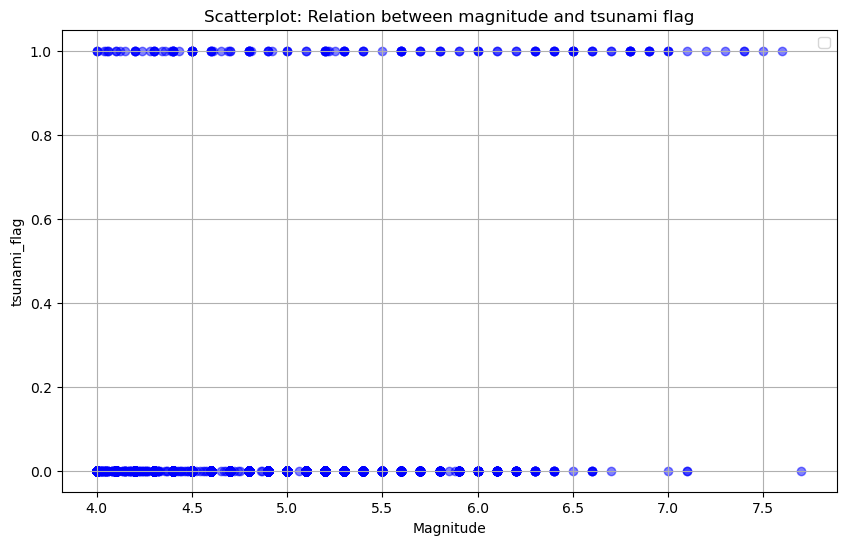

In [20]:
# Scatterplot: relation magnitude and tsunami yes/no
plt.figure(figsize=(10, 6))

plt.scatter(df_felt_complete['magnitude'], df_felt_complete['tsunami_flag'], alpha=0.5, color='blue')

plt.title('Scatterplot: Relation between magnitude and tsunami flag')
plt.xlabel('Magnitude')
plt.ylabel('tsunami_flag')
plt.legend()

plt.grid(True)
plt.show()

In [21]:
# Pearson Correlation Coefficient
correlation = df_felt_complete['magnitude'].corr(df_felt_complete['tsunami_flag'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

# Interpretation basierend auf Korrelationsstärke
if correlation >= 0.7:
    strength = "a strong positive"
elif correlation >= 0.4:
    strength = "a moderate positive"
elif correlation >= 0.2:
    strength = "a weak positive"
elif correlation > 0:
    strength = "a very weak positive"
elif correlation <= -0.7:
    strength = "a strong negative"
elif correlation <= -0.4:
    strength = "a moderate negative"
elif correlation <= -0.2:
    strength = "a weak negative"
elif correlation < 0:
    strength = "a very weak negative"
else:
    strength = "no"

# Final interpretation
if correlation != 0:
    print(f"There is {strength} correlation: As the magnitude increases, the likelihood of a tsunami occurring tends to {'increase' if correlation > 0 else 'decrease'}.")
else:
    print("There is no correlation between earthquake magnitude and the occurrence of a tsunami.")



Pearson Correlation Coefficient: 0.21
There is a weak positive correlation: As the magnitude increases, the likelihood of a tsunami occurring tends to increase.


/var/folders/4f/3kkpfrvj36l44smm9z3jpzq80000gn/T/ipykernel_22093/1805479564.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tsunami_rate = df_felt_complete.groupby('mag_bin')['tsunami_flag'].mean()


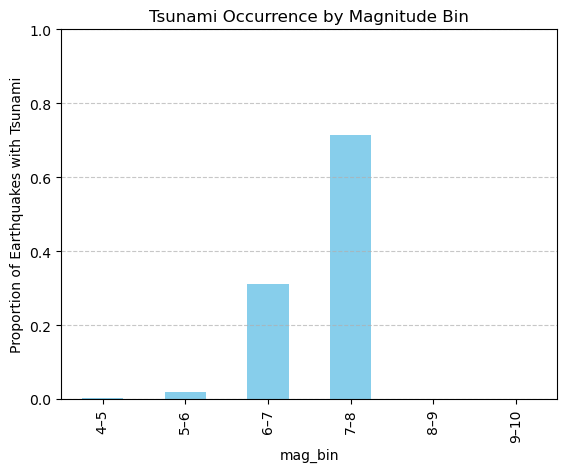

In [23]:
# Magnitude Bins erstellen
bins = [4, 5, 6, 7, 8, 9, 10]
labels = ['4–5', '5–6', '6–7', '7–8', '8–9', '9–10']
df_felt_complete['mag_bin'] = pd.cut(df_felt_complete['magnitude'], bins=bins, labels=labels, right=False)

# Gruppenweise Anteil Tsunamis berechnen
tsunami_rate = df_felt_complete.groupby('mag_bin')['tsunami_flag'].mean()

# Plot
tsunami_rate.plot(kind='bar', color='skyblue')
plt.ylabel('Proportion of Earthquakes with Tsunami')
plt.title('Tsunami Occurrence by Magnitude Bin')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()